In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import math

In [16]:
def generateODE(t, m):
    # Unpack the variables from the y vector
    m00, m10, m01, m11,c = m

    Ci=0.6215                     #gm/(100 gm of mixed solvent)
    Ce=0.383                      #gm/(100 gm of mixed solvent)
    
    #calulate neccessary quantity
    A1=0.001000009302753984
    g1=1.0000000012073436
    A2= 0.001
    g2= 1.4300000002543005
    kb=2.9999999991968114
    b=0.19000000134239053
    
    #A1 = 0.01               # m/s 
 #   A2 = 0.001               # m/s
  #  g1 = 2
   # g2 = 1
    #kb = 0.001                        # m3/sec
     #b = 1.86
    R = 8.314                        # joule\(k mol)
    T = 303.14                       # kelvin
    V = 0.0002                       # m3
    
    f=1.66*10**-7                     # m3/sec 
    
    
    ρc = 1400*10**3                    # gm/m3
    h = 1*10**(-5)                     # m
    Vc = h*m11
    
    ρl = 785*10**3                     # gm/m3
    
    
    # Canti=np.linspace(0,1000,120)
    # Ce= ((-2*10**(-6)*Canti**3)+(0.0003*Canti**2)+(-0.0274*Canti)+1.232)
    
    delta_c = max(c-Ce,0)
    s= delta_c/Ce
    
    k=3.14/6
    tau = V/f
    
    Gl=A1*(s)**g1
    
    Gw=A2*(s)**g2
    
    B= kb*(s)**b                                #B= kJ1*math.exp((-kJ2)/(np.log((s)**2)))
    
    dm00= B 
    dm10=(Gl*m00)
    dm01=(Gw*m00)
    dm11=(Gl*m10)+(Gw*m01)
    
    #dm20=(2*Gl*m10)+(-m20/tau)
    #dc=(Ci/tau)-(c/tau)-(g*(2*Gl*m11-Gl*m20+Gw*m20))
    
    dc=(Ci/tau)-(ρc/ρl)*Vc
    if c + dc < 0:
        dc = -c

    return [dm00, dm10, dm01, dm11,dc]
t_span=(0,1200)
num_points_0=1200
initialConditions = [0, 0, 0, 0,0.6213]
sol = solve_ivp(
    lambda t,m: generateODE(t,m),
    t_span,
    initialConditions,
    t_eval=np.linspace(t_span[0], t_span[1], num_points_0)
)

Text(0, 0.5, 'Concentration')

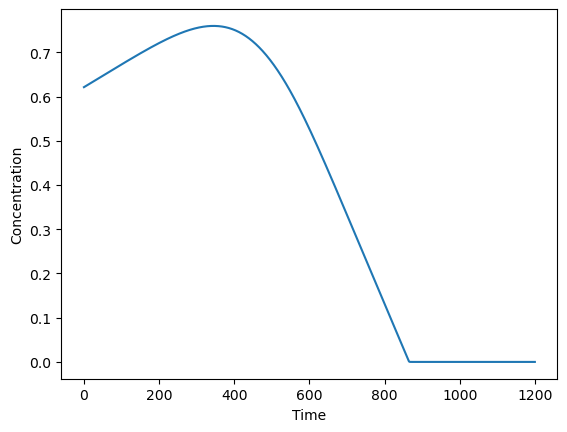

In [17]:
plt.plot(sol.t,sol.y[4])
plt.xlabel("Time")
plt.ylabel("Concentration")

Text(0, 0.5, '0,0 Moment')

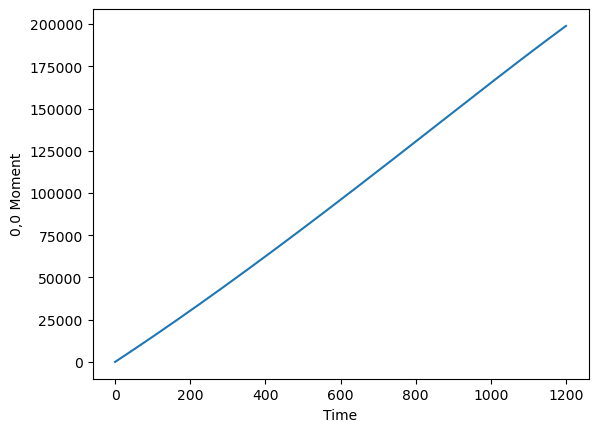

In [4]:
plt.plot(sol.t,sol.y[0])
plt.xlabel("Time")
plt.ylabel("0,0 Moment")

In [20]:
def generateODE1(t, m):
    # Unpack the variables from the y vector
    m00, m10, m01, m11,c = m

    Ci=0.6215                     #gm/(100 gm of mixed solvent)
    Ce=0.383                      #gm/(100 gm of mixed solvent)
    
    #calulate neccessary quantity
    
    A1=0.001000009302753984
    g1=1.0000000012073436
    A2= 0.001
    g2= 1.4300000002543005
    kb=2.9999999991968114
    b=0.19000000134239053
    R = 8.314                        # joule\(k mol)
    T = 303.14                       # kelvin
    V = 0.0002                       # m3
    
    
    f=1.66*10**-7                     # m3/sec 
    
    
    ρc = 1400*10**3                    # gm/m3
    h = 1*10**(-5)                     # m
    Vc = h*m11
    
    ρl = 785*10**3                     # gm/m3
    
    
    # Canti=np.linspace(0,1000,120)
    # Ce= ((-2*10**(-6)*Canti**3)+(0.0003*Canti**2)+(-0.0274*Canti)+1.232)
    
    delta_c = max(c-Ce,0)
    s= delta_c/Ce
    
    k=3.14/6
    tau = V/f
    
    Gl=A1*(s)**g1
    
    Gw=A2*(s)**g2
    
    B= kb*(s)**b                                #B= kJ1*math.exp((-kJ2)/(np.log((s)**2)))
    
    dm00= B - (m00/tau)
    dm10=(Gl*m00)-(m10/tau)
    dm01=(Gw*m00)-(m01/tau)
    dm11=(Gl*m10)+(Gw*m01)-(m11/tau)
    
    #dm20=(2*Gl*m10)+(-m20/tau)
    #dc=(Ci/tau)-(c/tau)-(g*(2*Gl*m11-Gl*m20+Gw*m20))
    
    dc=(Ci/tau)-(c/tau)-(ρc/ρl)*Vc
    if c + dc < 0:
        dc = -c

    return [dm00, dm10, dm01, dm11,dc]
t_span=(1201,10200)
num_points=10200
initialConditions = [0, 0, 0, 0,0.6213]
sol1 = solve_ivp(
    lambda t,m: generateODE1(t,m),
    t_span,
    initialConditions,
    t_eval=np.linspace(t_span[0], t_span[1], num_points)
)

In [23]:
Time = np.array([1500, 1800, 2100, 2400, 2700, 3000, 3300, 3600, 4200, 4800, 5400, 6000, 6600, 7200, 7800, 8400, 9000, 9600, 10200, 10800, 11400])
Concentration = np.array([0.6122350091, 0.5959560476, 0.5938954744, 0.5500765656,0.6114968206, 0.6070234998, 0.5788902845, 0.610397811,0.6083588308, 0.5728770596, 0.5014242911, 0.5840247494, 0.57757239,0.5915242927, 0.5709132766, 0.5668895169, 0.5516734093, 0.5404909623, 0.5322998247, 0.5335497518, 0.5308234767])


Text(0, 0.5, 'Concentration')

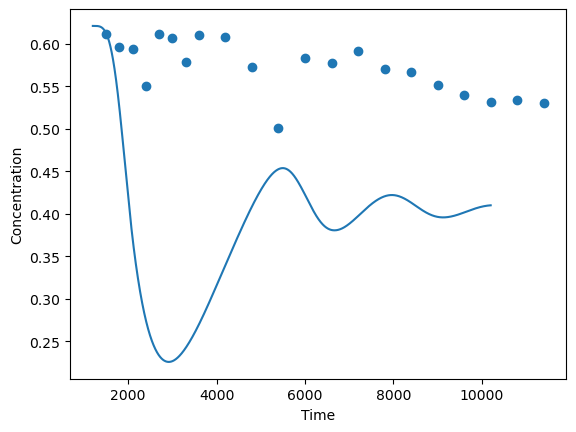

In [25]:
plt.scatter(Time, Concentration)
plt.plot(sol1.t,sol1.y[4])
plt.xlabel("Time")
plt.ylabel("Concentration")

C:\Users\heman\AppData\Local\Temp\ipykernel_14696\3090137653.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(sol1.t,sol1.y[1]/sol1.y[0])


Text(0, 0.5, '0,0 Moment')

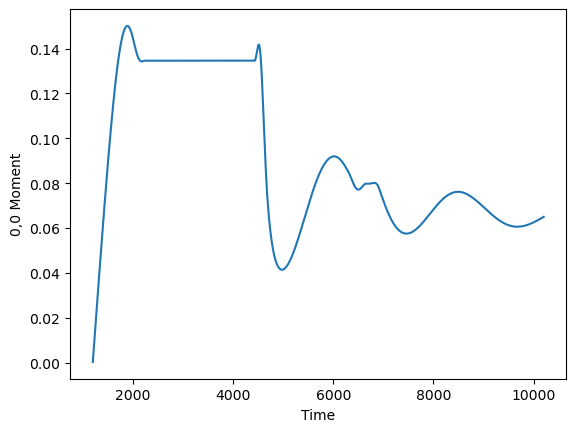

In [27]:
plt.plot(sol1.t,sol1.y[1]/sol1.y[0])
plt.xlabel("Time")
plt.ylabel("0,0 Moment")

Text(0, 0.5, '0,0 Moment')

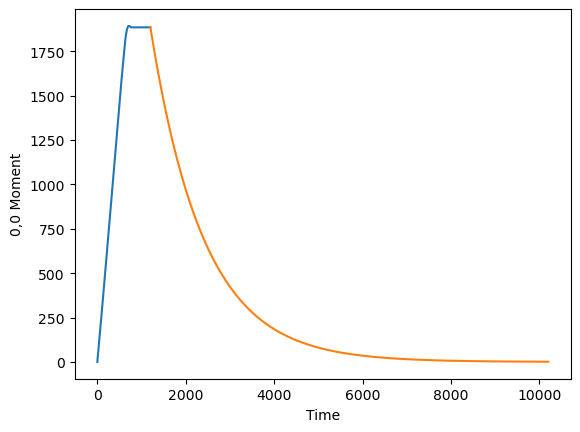

In [8]:
plt.plot(sol.t,sol.y[0])
plt.xlabel("Time")
plt.ylabel("0,0 Moment")
plt.plot(sol1.t,sol1.y[0])
plt.xlabel("Time")
plt.ylabel("0,0 Moment")

Text(0, 0.5, 'Concentration')

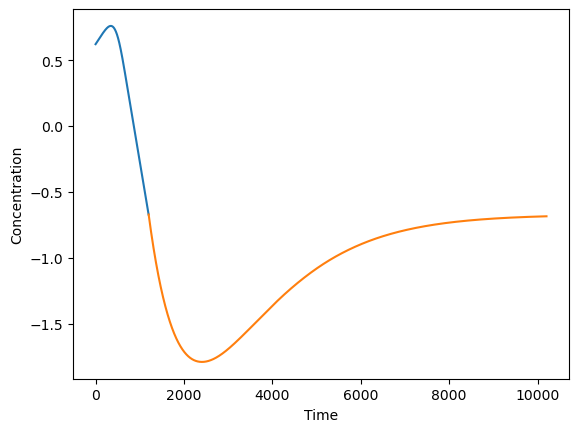

In [9]:
plt.plot(sol.t,sol.y[4])
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.plot(sol1.t,sol1.y[4])
plt.xlabel("Time")
plt.ylabel("Concentration")

Text(0, 0.5, ' 1,0 Moment')

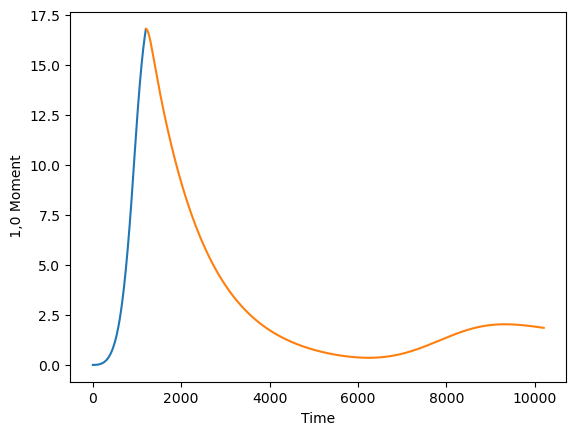

In [7]:
plt.plot(sol.t,sol.y[1])
plt.xlabel("Time")
plt.ylabel(" 1,0 Moment")
plt.plot(sol1.t,sol1.y[1])
plt.xlabel("Time")
plt.ylabel(" 1,0 Moment")

Text(0, 0.5, ' 0,1 Moment')

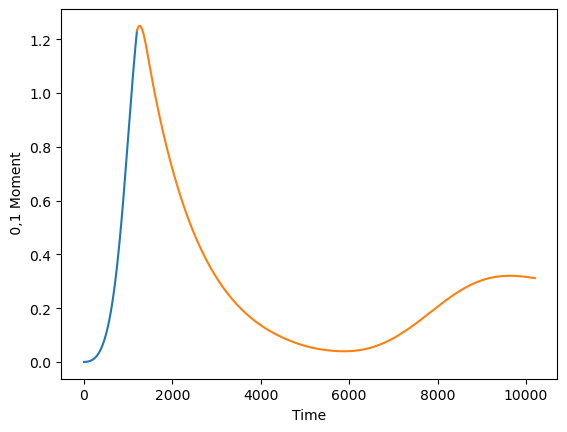

In [8]:
plt.plot(sol.t,sol.y[2])
plt.xlabel("Time")
plt.ylabel(" 0,1 Moment")
plt.plot(sol1.t,sol1.y[2])
plt.xlabel("Time")
plt.ylabel(" 0,1 Moment")

Text(0, 0.5, ' 1,1 Moment')

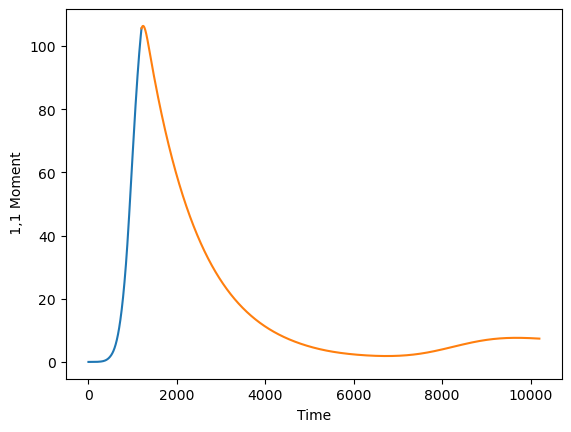

In [9]:
plt.plot(sol.t,sol.y[3])
plt.xlabel("Time")
plt.ylabel(" 1,1 Moment")
plt.plot(sol1.t,sol1.y[3])
plt.xlabel("Time")
plt.ylabel(" 1,1 Moment")

In [6]:
import pandas as pd
data=pd.read_excel(r"C:\Users\heman\Downloads\msmpr_conc_data (1).xlsx")

In [10]:
df=data[8:29]

In [11]:
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
8,5,0.612235,0.406598,0.234795,0.811907,0.578567,0.443152,0.929857,0.738969,0.567101,...,5,0.0059,0.017,0.013,0.0059,0.004,0.113,0.005,0.005,0.005
9,10,0.595956,0.398277,0.224436,0.808055,0.571823,0.37348,0.927375,0.726665,0.558067,...,10,0.0055,0.009,0.007,0.0055,0.006,0.017,0.004,0.003,0.015
10,15,0.593895,0.3891,0.2219,0.805613,0.534651,0.369445,0.924958,0.710491,0.552402,...,15,0.0074,0.016,0.009,0.0074,0.011,0.004,0.005,0.013,0.015
11,20,0.550077,0.404271,0.213551,0.80378,0.538398,0.365247,0.922864,0.704553,0.551438,...,20,0.014,0.018,0.01,0.014,0.003,0.017,0.013,0.005,0.007
12,25,0.611497,0.4086,0.211625,0.797105,0.528776,0.354519,0.916752,0.702074,0.54987,...,25,0.017,0.019,0.01,0.017,0.008,0.01,0.016,0.007,0.002
13,30,0.607023,0.389301,0.201415,0.795298,0.527455,0.353485,0.914132,0.699673,0.542641,...,30,0.028,0.005,0.008,0.028,0.004,0.022,0.007,0.004,0.004
14,35,0.57889,0.372303,0.200707,0.790137,0.524766,0.35411,0.908979,0.699078,0.520739,...,35,0.016,0.002,0.012,0.016,0.004,0.002,0.006,0.005,0.005
15,40,0.610398,0.373038,0.205413,0.79884,0.506507,0.350839,0.907445,0.698064,0.52063,...,40,0.003,0.007,0.0125,0.003,0.0395,0.023,0.011,0.006,0.007
16,50,0.608359,0.361165,0.198477,0.78927,0.496097,0.348623,0.903918,0.689744,0.5195,...,50,0.004,0.015,0.012,0.004,0.004,0.011,0.011,0.008,0.01
17,60,0.572877,0.355222,0.197384,0.779954,0.48317,0.344707,0.903063,0.686712,0.475518,...,60,0.008,0.011,0.02,0.008,0.006,0.01,0.007,0.005,0.004


In [12]:
np.array(df["Unnamed: 9"])

array([0.567100911, 0.55806661, 0.552402276, 0.551438362, 0.549870445,
       0.542640664, 0.520739187, 0.520630394, 0.519500363, 0.475518394,
       0.472627019, 0.463479808, 0.458483942, 0.450828365, 0.445943248,
       0.444370262, 0.443307854, 0.441843768, 0.441817087, 0.44552464,
       0.445840537], dtype=object)

In [3]:
concentration=[0.612235009,0.595956048,0.593895474,0.307591123,0.611496821,0.6070235,0.578890285,0.610397811,0.608358831,0.57287706,0.608444431,0.501424291,0.584024749,0.57757239,0.591524293,0.570913277,0.566889517,0.54092056,0.54006838,0.54047539,0.540251082,0.540751414]
len(concentration)

22

In [17]:
Time = [1500, 1800, 2100, 2400, 2700, 3000, 3300, 3600, 4200, 4800, 5400, 6000, 6600, 7200, 7800, 8400, 9000, 9600, 10200, 10800, 11400]
Concentration1 = [0.567100911, 0.55806661, 0.552402276, 0.551438362, 0.549870445,0.542640664, 0.520739187, 0.520630394, 0.519500363, 0.475518394,0.472627019, 0.463479808, 0.458483942, 0.450828365, 0.445943248,0.444370262, 0.443307854, 0.441843768, 0.441817087, 0.44552464,0.445840537]
Concentration=[0.612235009,0.595956048,0.593895474,0.597591123,0.611496821,0.6070235,0.578890285,0.610397811,0.608358831,0.57287706,0.608444431,0.501424291,0.584024749,0.57757239,0.591524293,0.570913277,0.566889517,0.54092056,0.54006838,0.54047539,0.540251082,0.540751414]

In [12]:
len(Concentration)

22

Text(0, 0.5, 'Concentration1')

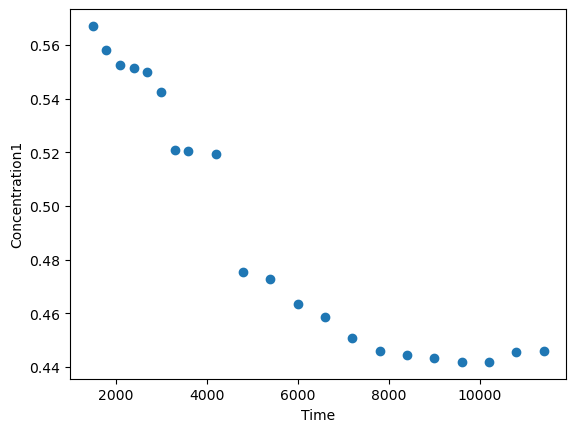

In [18]:
plt.scatter(Time,Concentration1)
plt.xlabel("Time")
plt.ylabel("Concentration1")

Optimized Parameters:
A1: 3.558252581571699e-05
g1: 1.916698043931513
A2: 0.000119821844059911
g2: 2.4248230400207604
kb: 159.66669804686777
b: 1.343686523997615


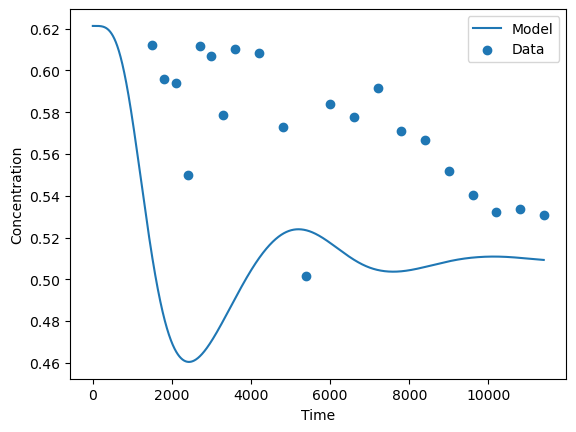

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

# Given data
Time = np.array([1500, 1800, 2100, 2400, 2700, 3000, 3300, 3600, 4200, 4800, 5400, 6000, 6600, 7200, 7800, 8400, 9000, 9600, 10200, 10800, 11400])
Concentration = np.array([0.6122350091, 0.5959560476, 0.5938954744, 0.5500765656,0.6114968206, 0.6070234998, 0.5788902845, 0.610397811,0.6083588308, 0.5728770596, 0.5014242911, 0.5840247494, 0.57757239,0.5915242927, 0.5709132766, 0.5668895169, 0.5516734093, 0.5404909623, 0.5322998247, 0.5335497518, 0.5308234767])

def generateODE2(t, m, A1, g1, A2, g2, kb, b, V):
    # Unpack the variables from the y vector
    m00, m10, m01, m11, c = m

    Ci = 0.6215                     # gm/(100 gm of mixed solvent)
    Ce = 0.383                      # gm/(100 gm of mixed solvent)
    
    #calulate neccessary quantity
    
    f = 1.66 * 10**-7                     # m3/sec 
    ρc = 1400 * 10**3                    # gm/m3
    h = 1 * 10**(-5)                     # m
    Vc = h * m11
    ρl = 785 * 10**3                     # gm/m3
    V = 0.0002
    tau = V / f
    
    delta_c = max(c - Ce, 0)
    s = delta_c / Ce
    
    Gl = A1 * (s)**g1
    Gw = A2 * (s)**g2
    B = kb * (s)**b

    dm00 = B - (m00 / tau)
    dm10 = (Gl * m00) - (m10 / tau)
    dm01 = (Gw * m00) - (m01 / tau)
    dm11 = (Gl * m10) + (Gw * m01) - (m11 / tau)
    dc = (Ci / tau) - (c / tau) - (ρc / ρl) * Vc

    return [dm00, dm10, dm01, dm11, dc]

def objective(params):
    A1, g1, A2, g2, kb, b = params
    V = 0.0002  # Volume, adjust as needed
    t_span = (0, 11400)  # Adjust this to match the maximum time in your data
    num_points = 11400
    initialConditions = [0, 0, 0, 0, 0.6213]
    sol = solve_ivp(
        lambda t, m: generateODE2(t, m, A1, g1, A2, g2, kb, b, V),
        t_span,
        initialConditions,
        t_eval=np.linspace(t_span[0], t_span[1], num_points)
    )
    
    # Ensure that the interpolation is within the range of the solution
    interp_t = np.clip(Time, sol.t[0], sol.t[-1])
    
    # Interpolate the solution at the time points specified in Time
    interp_solution = interp1d(sol.t, sol.y[4])
    model_predictions = interp_solution(Time)
    error = np.sum((model_predictions - Concentration)**2)  # Sum of squared differences
    return error

# Initial guess for parameters
initial_guess = [0.00001313983, 1, 0.00002593650, 1.43, 160, 0.19]

# Minimize the objective function
result = minimize(objective, initial_guess, method='COBYLA')

# Extract the optimized parameters
A1_opt, g1_opt, A2_opt, g2_opt, kb_opt, b_opt = result.x

print("Optimized Parameters:")
print("A1:", A1_opt)
print("g1:", g1_opt)
print("A2:", A2_opt)
print("g2:", g2_opt)
print("kb:", kb_opt)
print("b:", b_opt)

# Plot the optimized model against the data
t_span = (0, 11400)
num_points = 11400
initialConditions = [0, 0, 0, 0, 0.6213]
sol = solve_ivp(
    lambda t, m: generateODE2(t, m, A1_opt, g1_opt, A2_opt, g2_opt, kb_opt, b_opt, 0.0002),
    t_span,
    initialConditions,
    t_eval=np.linspace(t_span[0], t_span[1], num_points)
)
plt.plot(sol.t, sol.y[4], label='Model')
plt.scatter(Time, Concentration, label='Data')
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend()
plt.show()

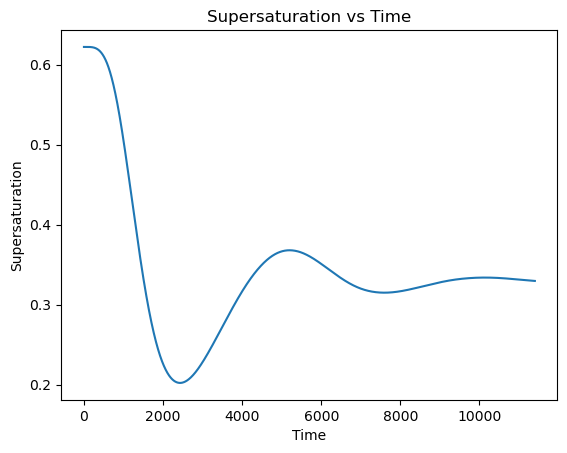

In [36]:
plt.plot(sol.t, ((sol.y[4] - 0.383) / 0.383))
plt.xlabel("Time")
plt.ylabel("Supersaturation")
plt.title("Supersaturation vs Time")
plt.show()

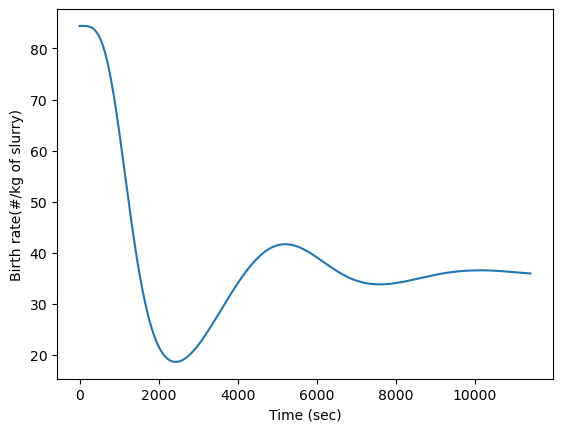

In [51]:
plt.plot(sol.t, kb_opt * ((sol.y[4] - 0.383) / 0.383)**b_opt)
plt.xlabel("Time (sec)")
plt.ylabel("Birth rate(#/kg of slurry)")
plt.show()

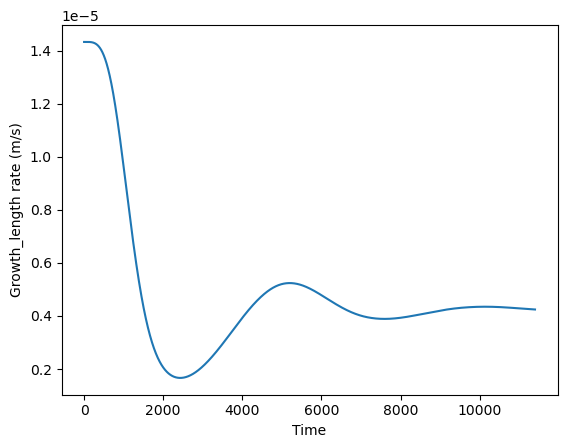

In [48]:
plt.plot(sol.t, A1_opt * ((sol.y[4] - 0.383) / 0.383)**g1_opt)
plt.xlabel("Time")
plt.ylabel("Growth_length rate (m/s)")
plt.show()

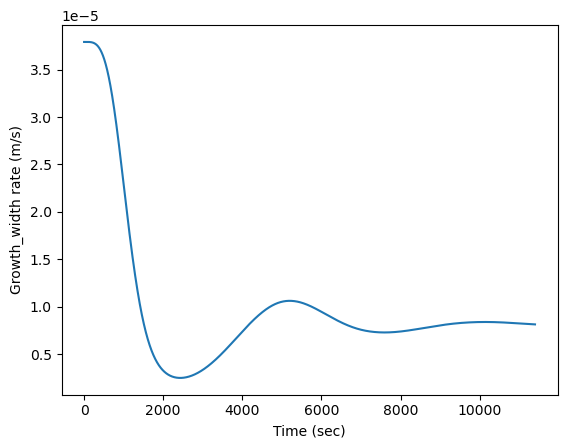

In [47]:
plt.plot(sol.t, A2_opt * ((sol.y[4] - 0.383) / 0.383)**g2_opt)
plt.xlabel("Time (sec)")
plt.ylabel("Growth_width rate (m/s)")
plt.show()

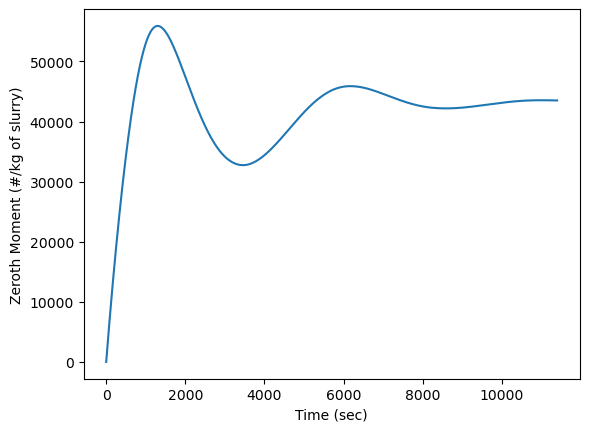

In [50]:
plt.plot(sol.t, sol.y[0], label='Model')
plt.xlabel("Time (sec)")
plt.ylabel("Zeroth Moment (#/kg of slurry)")
plt.show()

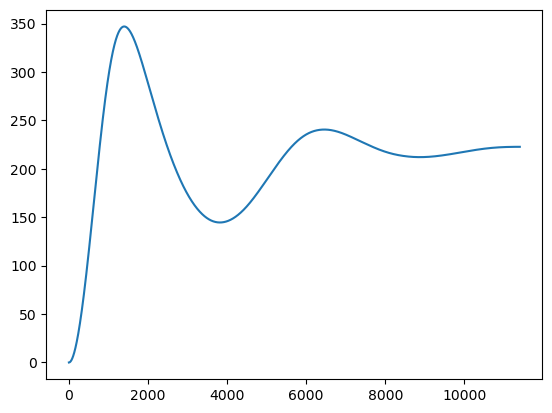

In [33]:
plt.plot(sol.t, sol.y[1], label='Model')

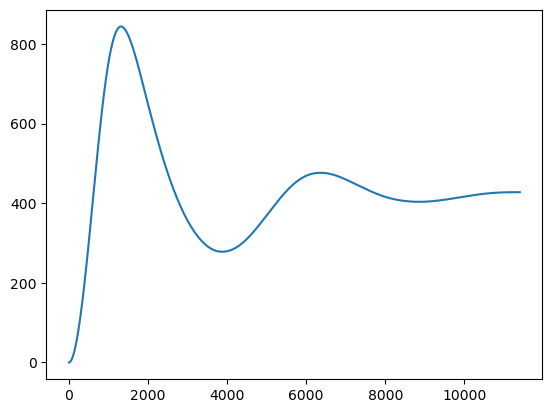

In [34]:
plt.plot(sol.t, sol.y[2], label='Model')

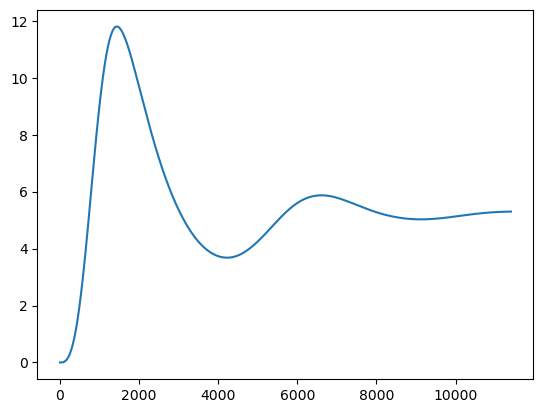

In [35]:
plt.plot(sol.t, sol.y[3], label='Model')

In [38]:
def generateODE(t, m):
    # Unpack the variables from the y vector
    m00, m10, m01, m11,c = m

    Ci=0.6215                     #gm/(100 gm of mixed solvent)
    Ce=0.383                      #gm/(100 gm of mixed solvent)
    
    #calulate neccessary quantity
    
    A1 = 3.55*10**(-5)               # m/s 
    A2 = 0.0001198              # m/s
    g1 = 1.91
    g2 = 2.4248
    kb = 159.666                         # m3/sec
    b = 1.3436
    R = 8.314                        # joule\(k mol)
    T = 303.14                       # kelvin
    V = 0.0002                       # m3
    
    f=1.66*10**-7                     # m3/sec 
    
    
    ρc = 1400*10**3                    # gm/m3
    h = 1*10**(-5)                     # m
    Vc = h*m11
    
    ρl = 785*10**3                     # gm/m3
    
    
    # Canti=np.linspace(0,1000,120)
    # Ce= ((-2*10**(-6)*Canti**3)+(0.0003*Canti**2)+(-0.0274*Canti)+1.232)
    
    delta_c = max(c-Ce,0)
    s= delta_c/Ce
    
    k=3.14/6
    tau = V/f
    
    Gl=A1*(s)**g1
    
    Gw=A2*(s)**g2
    
    B= kb*(s)**b                                #B= kJ1*math.exp((-kJ2)/(np.log((s)**2)))
    
    dm00= B 
    dm10=(Gl*m00)
    dm01=(Gw*m00)
    dm11=(Gl*m10)+(Gw*m01)
    
    #dm20=(2*Gl*m10)+(-m20/tau)
    #dc=(Ci/tau)-(c/tau)-(g*(2*Gl*m11-Gl*m20+Gw*m20))
    
    dc=(Ci/tau)-(ρc/ρl)*Vc

    return [dm00, dm10, dm01, dm11,dc]
t_span=(0,1000)
num_points_0=1200
initialConditions = [0, 0, 0, 0,0.6213]
sol1 = solve_ivp(
    lambda t,m: generateODE(t,m),
    t_span,
    initialConditions,
    t_eval=np.linspace(t_span[0], t_span[1], num_points_0)
)

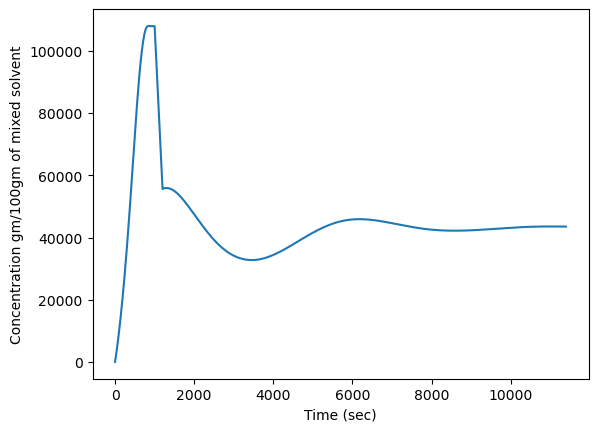

In [44]:
plt.plot(np.append(sol1.t,sol.t[1200:]),np.append(sol1.y[0], sol.y[0,1200:]))
plt.xlabel("Time (sec)")
plt.ylabel("Concentration gm/100gm of mixed solvent")
plt.show()

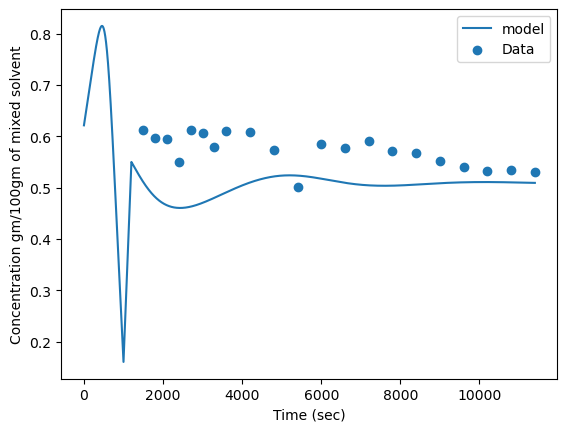

In [40]:
plt.plot(np.append(sol1.t,sol.t[1200:]),np.append(sol1.y[4], sol.y[4,1200:]), label ="model")
plt.scatter(Time, Concentration, label='Data')
plt.xlabel("Time (sec)")
plt.ylabel("Concentration gm/100gm of mixed solvent")
plt.legend()
plt.show()

Optimized Parameters:
A1: 9.13141346055796e-05
g1: 1.9182628909609223
A2: -3.5986297399994155e-05
g2: 2.4309265483622737
kb: 159.6693115234551
b: 1.3436865245540965


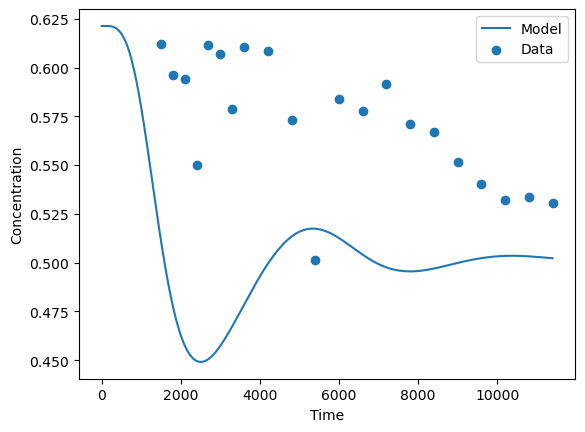

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

# Given data
Time = np.array([1500, 1800, 2100, 2400, 2700, 3000, 3300, 3600, 4200, 4800, 5400, 6000, 6600, 7200, 7800, 8400, 9000, 9600, 10200, 10800, 11400])
Concentration = np.array([0.6122350091, 0.5959560476, 0.5938954744, 0.5500765656,0.6114968206, 0.6070234998, 0.5788902845, 0.610397811,0.6083588308, 0.5728770596, 0.5014242911, 0.5840247494, 0.57757239,0.5915242927, 0.5709132766, 0.5668895169, 0.5516734093, 0.5404909623, 0.5322998247, 0.5335497518, 0.5308234767])

def generateODE2(t, m, A1, g1, A2, g2, kb, b, V):
    # Unpack the variables from the y vector
    m00, m10, m01, m11, c = m

    Ci = 0.6215                     # gm/(100 gm of mixed solvent)
    Ce = 0.383                      # gm/(100 gm of mixed solvent)
    
    #calulate neccessary quantity
    
    f = 1.66 * 10**-7                     # m3/sec 
    ρc = 1400 * 10**3                    # gm/m3
    h = 1 * 10**(-5)                     # m
    Vc = h * m11
    ρl = 785 * 10**3                     # gm/m3
    V = 0.0002
    tau = V / f
    
    delta_c = max(c - Ce, 0)
    s = delta_c / Ce
    
    Gl = A1 * (s)**g1
    Gw = A2 * (s)**g2
    B = kb * (s)**b

    dm00 = B - (m00 / tau)
    dm10 = (Gl * m00) - (m10 / tau)
    dm01 = (Gw * m00) - (m01 / tau)
    dm11 = (Gl * m10) + (Gw * m01) - (m11 / tau)
    dc = (Ci / tau) - (c / tau) - (ρc / ρl) * Vc

    return [dm00, dm10, dm01, dm11, dc]

def objective(params):
    A1, g1, A2, g2, kb, b = params
    V = 0.0002  # Volume, adjust as needed
    t_span = (0, 11400)  # Adjust this to match the maximum time in your data
    num_points = 11400
    initialConditions = [0, 0, 0, 0, 0.6213]
    sol = solve_ivp(
        lambda t, m: generateODE2(t, m, A1, g1, A2, g2, kb, b, V),
        t_span,
        initialConditions,
        t_eval=np.linspace(t_span[0], t_span[1], num_points)
    )
    
    # Ensure that the interpolation is within the range of the solution
    interp_t = np.clip(Time, sol.t[0], sol.t[-1])
    
    # Interpolate the solution at the time points specified in Time
    interp_solution = interp1d(sol.t, sol.y[4])
    model_predictions = interp_solution(Time)
    # Calculate negative log-likelihood
    sigma = 0.01  # Standard deviation of the error
    nll = 0.5 * np.sum(((model_predictions - Concentration) / sigma)**2 + np.log(2 * np.pi * sigma**2))
    
    return nll

# Initial guess for parameters
initial_guess = [0.00001313983, 1, 0.00002593650, 1.43, 160, 0.19]

# Minimize the objective function
result = minimize(objective, initial_guess, method='COBYLA')

# Extract the optimized parameters
A1_opt, g1_opt, A2_opt, g2_opt, kb_opt, b_opt = result.x

print("Optimized Parameters:")
print("A1:", A1_opt)
print("g1:", g1_opt)
print("A2:", A2_opt)
print("g2:", g2_opt)
print("kb:", kb_opt)
print("b:", b_opt)

# Plot the optimized model against the data
t_span = (0, 11400)
num_points = 11400
initialConditions = [0, 0, 0, 0, 0.6213]
sol = solve_ivp(
    lambda t, m: generateODE2(t, m, A1_opt, g1_opt, A2_opt, g2_opt, kb_opt, b_opt, 0.0002),
    t_span,
    initialConditions,
    t_eval=np.linspace(t_span[0], t_span[1], num_points)
)
plt.plot(sol.t, sol.y[4], label='Model')
plt.scatter(Time, Concentration, label='Data')
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend()
plt.show()